# Modelo de Arbol de decision


In [10]:
# Importar recursos
from services.transformaciones import CargaDatos
from config.parametros import RutaDataSet as RT
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [11]:
# Importar la matriz X
X_matriz = CargaDatos('Archivos')
X = X_matriz.leer_matriz_numpy(nombre_matriz=RT.X)
X.shape

(16170, 58)

In [12]:
# Importar la matriz y
y_matriz = CargaDatos('Archivos')
y = y_matriz.leer_matriz_numpy(nombre_matriz=RT.y)
y.shape

(16170,)

In [13]:
# Importar la matriz e que contiene las etiquetas de la matriz
e_matriz = CargaDatos('Archivos')
e = e_matriz.leer_matriz_numpy(nombre_matriz=RT.e)
e.shape

(16170,)

In [14]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test, e_train, e_test = train_test_split(X, y, e, test_size=0.3, random_state=42)

In [15]:
# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Informe de clasificación:")
print(report)


Precisión del modelo: 0.85
Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.91      4269
         1.0       0.35      0.31      0.33       582

    accuracy                           0.85      4851
   macro avg       0.63      0.62      0.62      4851
weighted avg       0.84      0.85      0.84      4851



# Evaluacion del modelo usando AUC 
(*Área Bajo la Curva ROC*)
La curva ROC es una metrica importante usada para evaludar modelos de clasificacion binaria en funcion de diferentes umbrales evaluados durante el testing de modelo.
En el eje x se representan la tasa de falsos positivos(FPR) y en el eje y la tasa de Verdaderos Positivos(TPR) el area bajo la curva se evalua entre 0 y 1 entre mas cercano sea a 0.5 indica que el modelo es incapas de predecir la variable dependiente correctamente. 


$\textbf{Tasa de Verdaderos Positivos (TPR):}$
$\text{TPR} = \frac{\text{Verdaderos Positivos (TP)}}{\text{Verdaderos Positivos (TP)} + \text{Falsos Negativos (FN)}}$

$\textbf{Tasa de Falsos Positivos (FPR):}$
$\text{FPR} = \frac{\text{Falsos Positivos (FP)}}{\text{Falsos Positivos (FP)} + \text{Verdaderos Negativos (TN)}}$

AUC-ROC: 0.6171238506003885


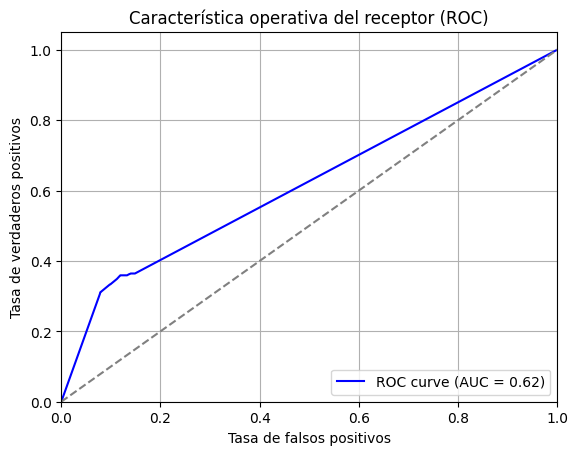

In [17]:
y_prob = clf.predict_proba(X_test)[:, 1]
# Calcular AUC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {auc}')
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Trazar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Característica operativa del receptor (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

* Evaludacion del modelo:
El modelo muestra un resultado de 0.62 lo que indica un capacidad discriminativa moderada para clasificar los datos de cliente que tomarian o no un CDT

# Generar DataFrame con las salidas

In [18]:
# Hacer predicciones en el conjunto de prueba
y_prob = clf.predict(X_test).flatten()

# Crear un DataFrame con los IDs y las probabilidades predichas
resultados = pd.DataFrame({
    'ID': e_test.flatten(),
    'y': y_prob
})
resultados.to_csv(RT.ArbolDecision,encoding='utf-8',sep=',',index=False)